In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()   # ----------------------격자 그리기

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# 한글 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:\\Windows\\Fonts\\H2GSRB.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.title('한글제목')
plt.show()

<pre>
Attribute Information (in order):
        - CRIM     : 범죄율
        - ZN        :  거주지역 비율  - 25,000(평방) sq.ft. 초과 
        - INDUS    : 상업지역 면적 비율
        - CHAS     찰스강 인근 (1:인근 0:x)
        - NOX      일산화질소 농도(parts per 10 million)
        - RM       : 평균 룸 수
        - AGE      : 1940년 이전에 건축된 주택 비율 
        - DIS       : 직업센터와의 거리
        - RAD      : 고속도로 진입과의 거리 
        - TAX       : 제산세 (rate per $10,000)
        - PTRATIO  : 교사/학생 비율
        - B            : 흑인비율 1000(Bk - 0.63)^2 
        - LSTAT     : 하위계층 비율 (%)
        - price(MEDV)    :  집값


In [2]:
# 집값에 지대한 영향을 미치는 부분

In [7]:
df = pd.read_csv("./data/price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


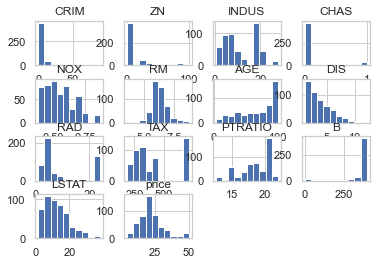

In [42]:
df.hist()
plt.show()

<AxesSubplot:>

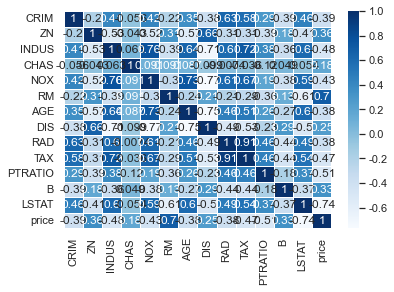

In [61]:
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=.5)
# -- 히트맵만으로는 관계를 완전히 정의하기는 어렵다 ( 이변량 간의 선형관계  (= 상관분석 ) 만 입증가능 )

In [51]:
temp = df.corr().nlargest(5,"price")
temp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
price,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


In [55]:
np.sort(temp[temp.index == "price"].values) # ----- -0.73766273
np.sort(temp[temp.index == "price"].values)[::-1] # -------------- 0.69535995

array([[-0.73766273, -0.50778669, -0.48372516, -0.46853593, -0.42732077,
        -0.38830461, -0.38162623, -0.37695457,  0.17526018,  0.24992873,
         0.33346082,  0.36044534,  0.69535995,  1.        ]])

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

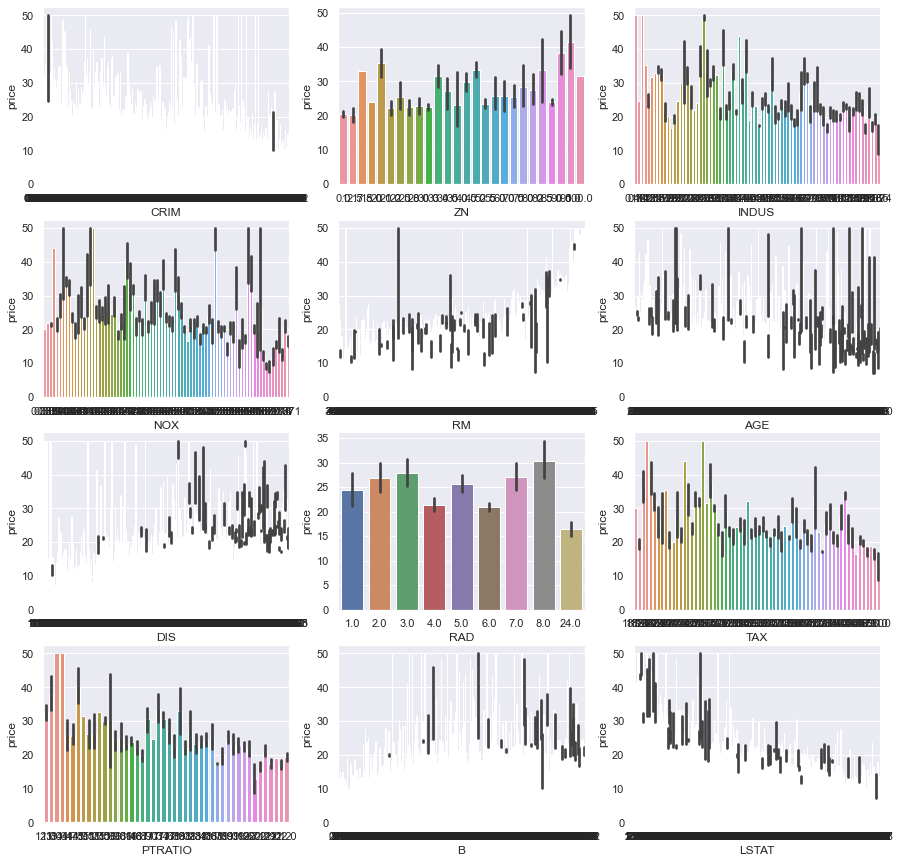

In [32]:
fig, axes = plt.subplots(4, 3, figsize = (15,15)) 
sns.barplot(data=df, x="CRIM", y="price", ax =axes[0][0])
sns.barplot(data=df, x="ZN", y="price", ax =axes[0][1])
sns.barplot(data=df, x="INDUS", y="price", ax =axes[0][2])
sns.barplot(data=df, x="NOX", y="price", ax =axes[1][0])
sns.barplot(data=df, x="RM", y="price", ax =axes[1][1])
sns.barplot(data=df, x="AGE", y="price", ax =axes[1][2])
sns.barplot(data=df, x="DIS", y="price", ax =axes[2][0])
sns.barplot(data=df, x="RAD", y="price", ax =axes[2][1])
sns.barplot(data=df, x="TAX", y="price", ax =axes[2][2])
sns.barplot(data=df, x="PTRATIO", y="price", ax =axes[3][0])
sns.barplot(data=df, x="B", y="price", ax =axes[3][1])
sns.barplot(data=df, x="LSTAT", y="price", ax =axes[3][2])

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

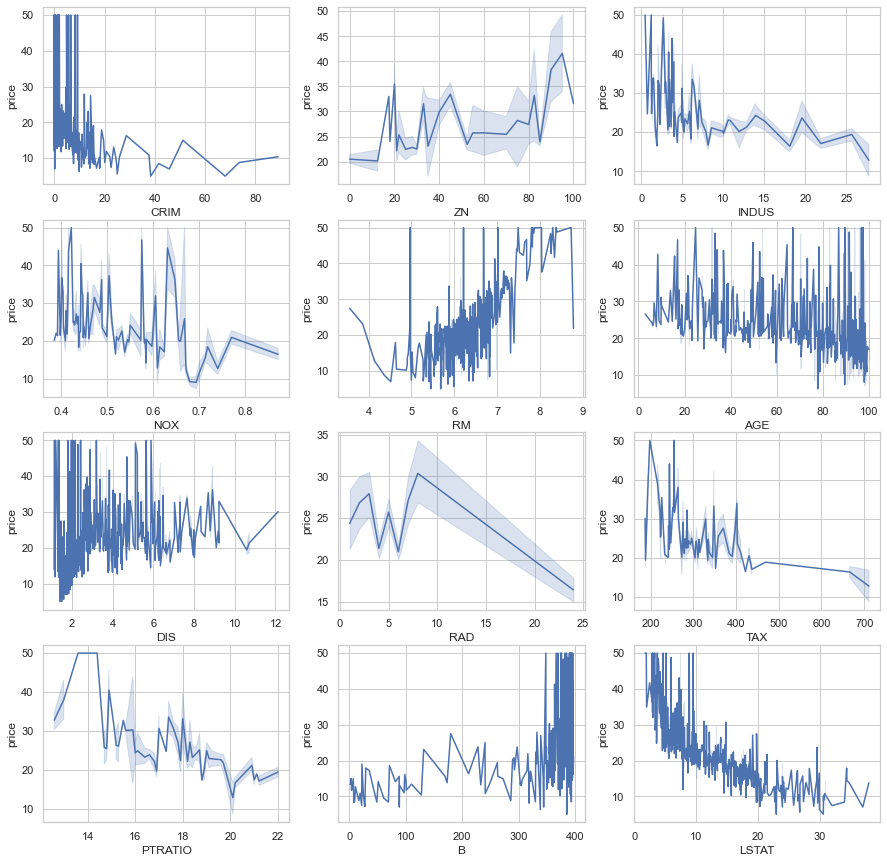

In [38]:
fig, axes = plt.subplots(4, 3, figsize = (15,15)) 
sns.lineplot(data=df, x="CRIM", y="price", ax =axes[0][0])
sns.lineplot(data=df, x="ZN", y="price", ax =axes[0][1])
sns.lineplot(data=df, x="INDUS", y="price", ax =axes[0][2])
sns.lineplot(data=df, x="NOX", y="price", ax =axes[1][0])
sns.lineplot(data=df, x="RM", y="price", ax =axes[1][1])
sns.lineplot(data=df, x="AGE", y="price", ax =axes[1][2])
sns.lineplot(data=df, x="DIS", y="price", ax =axes[2][0])
sns.lineplot(data=df, x="RAD", y="price", ax =axes[2][1])
sns.lineplot(data=df, x="TAX", y="price", ax =axes[2][2])
sns.lineplot(data=df, x="PTRATIO", y="price", ax =axes[3][0])
sns.lineplot(data=df, x="B", y="price", ax =axes[3][1])
sns.lineplot(data=df, x="LSTAT", y="price", ax =axes[3][2])

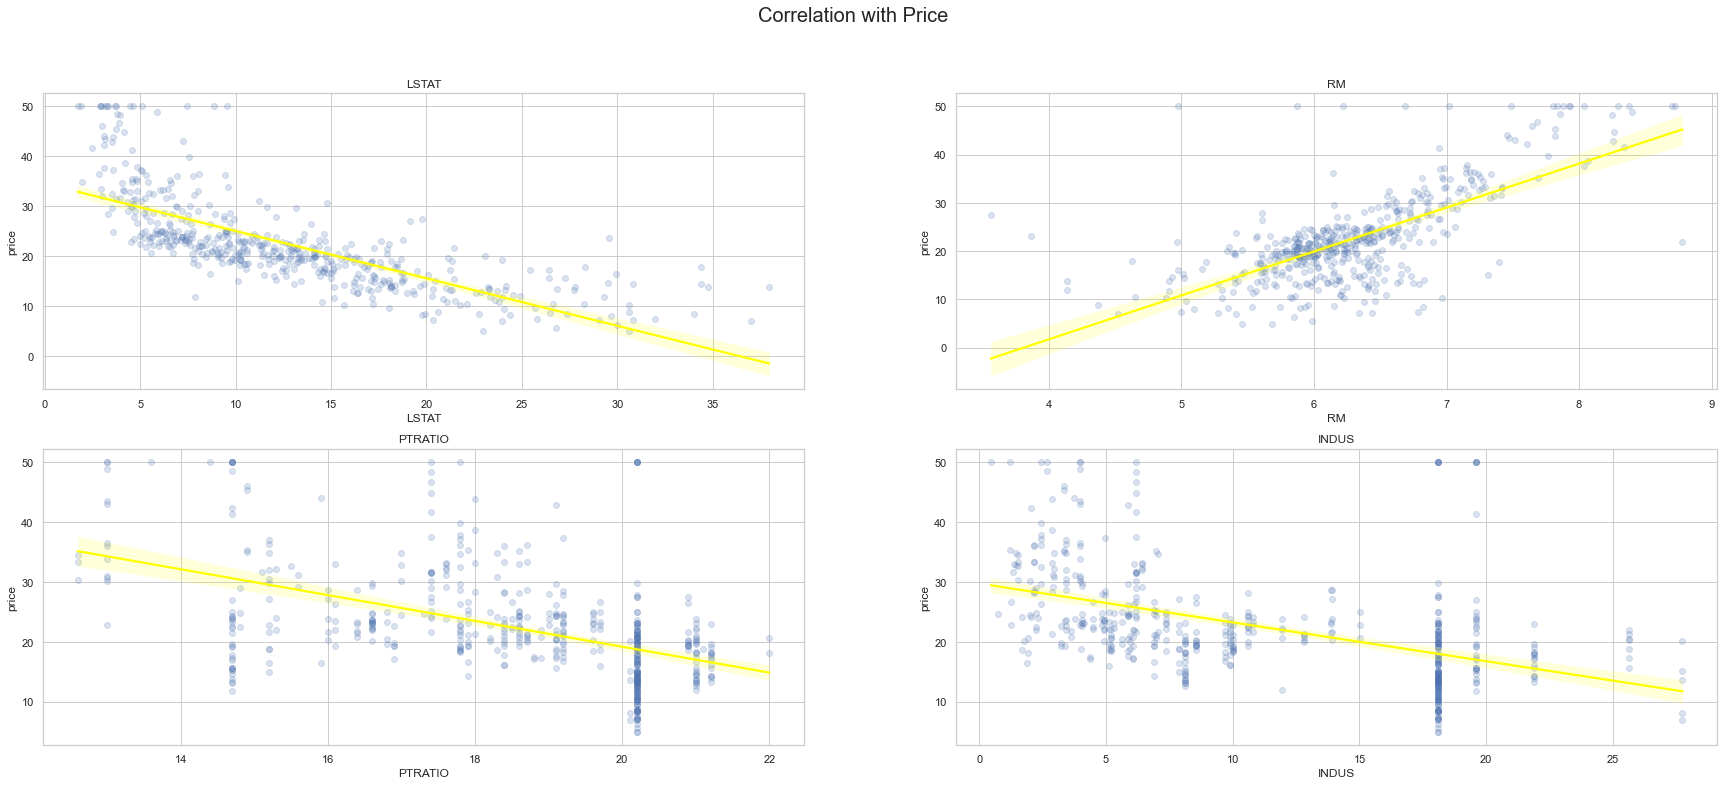

In [63]:
train = df
fig, axes = plt.subplots(2,2,figsize = (30,12))
a=sns.regplot(x='LSTAT', y='price', data=train, scatter_kws={'alpha': 0.2}
            , line_kws={'color': 'yellow'}, ax=axes[0][0])
a.set_title("LSTAT")
b=sns.regplot(x='RM', y='price', data=train, scatter_kws={'alpha': 0.2}
            , line_kws={'color': 'yellow'}, ax=axes[0][1])
b.set_title("RM")
c=sns.regplot(x='PTRATIO', y='price', data=train, scatter_kws={'alpha': 0.2}
            , line_kws={'color': 'yellow'}, ax=axes[1][0])
c.set_title("PTRATIO")
d=sns.regplot(x='INDUS', y='price', data=train, scatter_kws={'alpha': 0.2}
            , line_kws={'color': 'yellow'}, ax=axes[1][1])
d.set_title("INDUS")
plt.suptitle('Correlation with Price',fontsize=20)

plt.show()


In [66]:
df[['price','RM']].corr().iloc[0,1]

0.6953599470715401

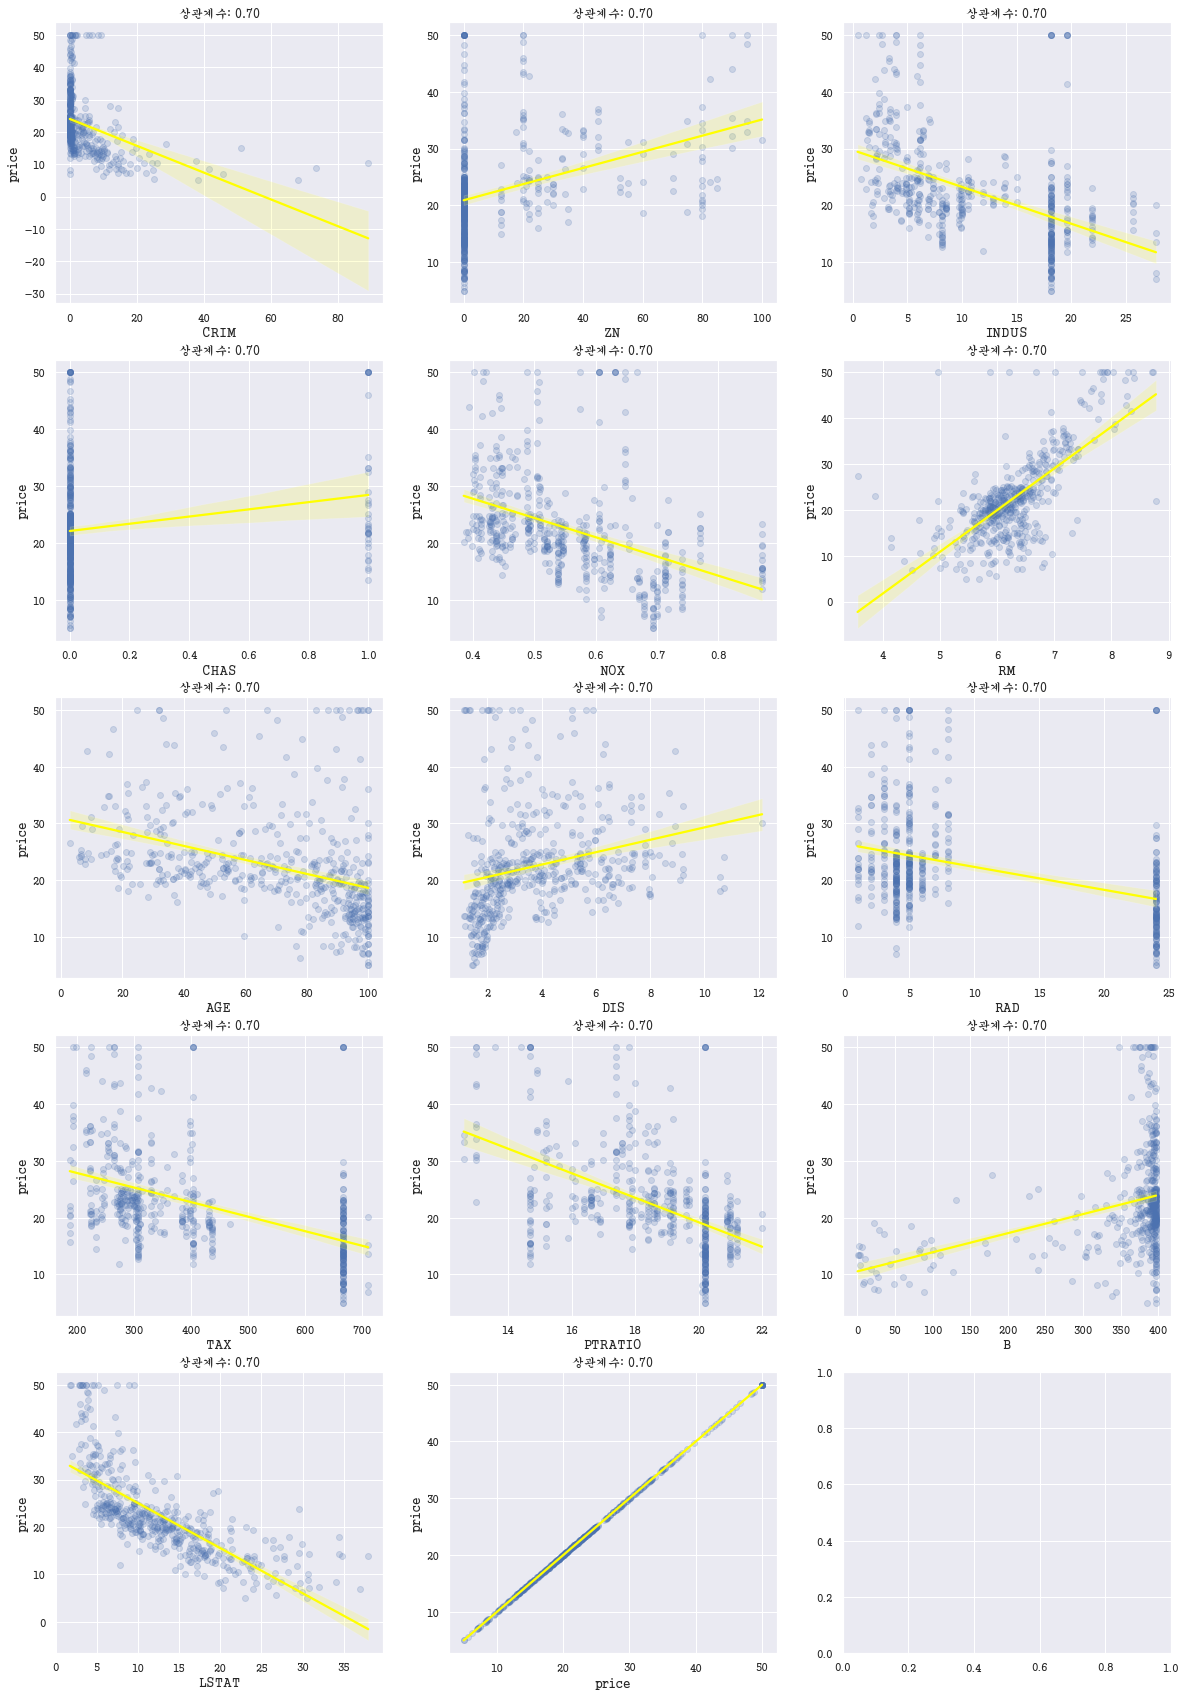

In [87]:
fig, axes = plt.subplots(5,3,figsize = (20,30))
for i, col in enumerate(df.columns):
    몫     =  i//3 
    나머지 =  i%3
    # print( i, 몫, 나머지)
    p=sns.regplot(x=col, y='price', data=df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'yellow'}, 
                ax=axes[몫][나머지])
    #p.set_title(col)
    p.set_title(f"상관계수: {df[['price','RM']].corr().iloc[0,1]:.2f}")


In [80]:
import matplotlib.font_manager as fm

findfont: Font family ['HancomEQN.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['HancomEQN.ttf'] not found. Falling back to DejaVu Sans.


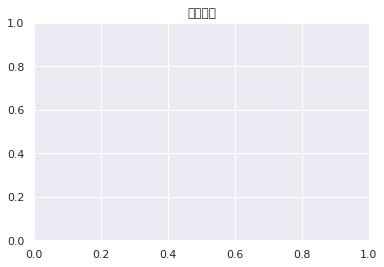

In [84]:
plt.rc('font', family='HancomEQN.ttf') 
plt.title('한글제목')
plt.show()


HYGungSo-Bold


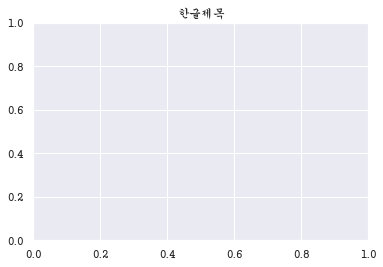

In [86]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:\\Windows\\Fonts\\H2GSRB.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.title('한글제목')
plt.show()